# Multi-Layer Perceptron in `keras`

In this series of lab sessions, you will use a Python library called `keras` (that is in fact embedded inside a larger library called `tensorflow`, but we will not discuss `tensorflow` in this course).
You should visit [`keras` webpage](https://www.tensorflow.org/guide/keras/overview) to get access to more information about this library, including a comprehensive documentation.

## The `Sequential` model in `keras`

This library offers two ways to define neural network models. 
We will start with the `Sequential` class of `keras` models.
Below is an example of how to define a `Sequential` model:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

**1. Define layers, and add them one by one to the model**


In [ ]:
input_layer = InputLayer(input_shape=(24,))
hidden_layer1 = Dense(units=12, activation="relu")
hidden_layer2 = Dense(units=12, activation="sigmoid")
#[...]
output_layer = Dense(units=3, activation="linear")

model = Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    # ...
    output_layer
])

**2. Pick an optimization algorithm (optimizer) and a loss function to be optimized**

Usual loss functions are:
* `"mse"` for regression,
* `"categorical_crossentropy"` for multiclass classification (when the `y` array fed to `fit` is of shape $(n, n_\text{classes})$)
* `"binary_crossentropy"` for binary classification (when the model is fed with `y` array of shape $(n, 1)$)

One can also specify additional metrics to be printed during training (correct classification rate here).

In [ ]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

**3. Fit the model**

NB: do not try to execute the following line of code: variables `X_train` and `y_train` do not exist yet!

In [ ]:
#model.fit(X_train, y_train, verbose=2, epochs=10, batch_size=200)

## Data pre-processing

Have a look at the `prepare_mnist` and `prepare_boston` functions defined below.

**Question #1.** What do these functions do? What are the shapes of returned arrays? Does the returned data correpond to classification or regression problems?

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist, boston_housing
from tensorflow.keras.utils import to_categorical

def prepare_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test


def prepare_boston():
    (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
    scaler_x = MinMaxScaler()
    scaler_x.fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    scaler_y = MinMaxScaler()
    scaler_y.fit(y_train.reshape((-1, 1)))
    y_train = scaler_y.transform(y_train.reshape((-1, 1)))
    y_test = scaler_y.transform(y_test.reshape((-1, 1)))
    return x_train, x_test, y_train, y_test
  
x_train, x_test, y_train, y_test = prepare_mnist()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train, x_test, y_train, y_test = prepare_boston()
print(x_train.shape, y_train.shape)
print(y_train.max())

57344/57026 [==============================] - 0s 0us/step
(404, 13) (404, 1)
1.0


## Building your first models

In the following, when fitting models, restrict the training to 10 epochs (which is not realistic, but training for more epochs takes time...)

**Question #2.** Following the guidelines provided above, implement a linear regression model for the `boston` dataset that would optimize on a least squares objective using Stochastic Gradient Descent and fit your model to the corresponding training data.

In [ ]:
model = Sequential([
    InputLayer(input_shape=(13,)),
    Dense(units=1, activation="linear")
])

model.compile(optimizer="sgd", loss="mse")
model.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200)

Epoch 1/10
3/3 - 0s - loss: 0.1284
Epoch 2/10
3/3 - 0s - loss: 0.1275
Epoch 3/10
3/3 - 0s - loss: 0.1269
Epoch 4/10
3/3 - 0s - loss: 0.1260
Epoch 5/10
3/3 - 0s - loss: 0.1254
Epoch 6/10
3/3 - 0s - loss: 0.1245
Epoch 7/10
3/3 - 0s - loss: 0.1242
Epoch 8/10
3/3 - 0s - loss: 0.1234
Epoch 9/10
3/3 - 0s - loss: 0.1228
Epoch 10/10
3/3 - 0s - loss: 0.1229


**Question #3.** Similarly, define a logistic regression model for the `mnist` dataset and print its training accuracy during training.

In [ ]:
x_train, x_test, y_train, y_test = prepare_mnist()
print(x_train.shape, y_train.shape)
print(x_train.max())

(60000, 784) (60000, 10)
1.0


In [ ]:


model = Sequential([
    InputLayer(input_shape=(784,)),
    Dense(units=10, activation="softmax")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200)

Epoch 1/10
300/300 - 1s - loss: 1.5095 - accuracy: 0.6247
Epoch 2/10
300/300 - 1s - loss: 0.8670 - accuracy: 0.8214
Epoch 3/10
300/300 - 1s - loss: 0.6914 - accuracy: 0.8462
Epoch 4/10
300/300 - 1s - loss: 0.6073 - accuracy: 0.8579
Epoch 5/10
300/300 - 1s - loss: 0.5566 - accuracy: 0.8660
Epoch 6/10
300/300 - 1s - loss: 0.5220 - accuracy: 0.8712
Epoch 7/10
300/300 - 1s - loss: 0.4966 - accuracy: 0.8749
Epoch 8/10
300/300 - 1s - loss: 0.4770 - accuracy: 0.8777
Epoch 9/10
300/300 - 1s - loss: 0.4613 - accuracy: 0.8806
Epoch 10/10
300/300 - 1s - loss: 0.4483 - accuracy: 0.8826


**Question #4.** Compare performance (in terms of training accuracy, we will come back to better ways to compare models afterwards) of this logistic regression model with that of a neural network with respectively 1, 2, and 3 hidden layers of 128 neurons each.
You will use the `"relu"` activation function for hidden layers.

In [ ]:
model = Sequential([
    InputLayer(input_shape=(784,)),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation="softmax")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200)

Epoch 1/10
300/300 - 3s - loss: 1.7743 - accuracy: 0.5309
Epoch 2/10
300/300 - 3s - loss: 0.6965 - accuracy: 0.8326
Epoch 3/10
300/300 - 3s - loss: 0.4535 - accuracy: 0.8774
Epoch 4/10
300/300 - 3s - loss: 0.3805 - accuracy: 0.8926
Epoch 5/10
300/300 - 3s - loss: 0.3422 - accuracy: 0.9027
Epoch 6/10
300/300 - 3s - loss: 0.3162 - accuracy: 0.9097
Epoch 7/10
300/300 - 3s - loss: 0.2963 - accuracy: 0.9146
Epoch 8/10
300/300 - 3s - loss: 0.2801 - accuracy: 0.9192
Epoch 9/10
300/300 - 3s - loss: 0.2662 - accuracy: 0.9232
Epoch 10/10
300/300 - 3s - loss: 0.2539 - accuracy: 0.9264


**Question #5.** `keras` models offer a `count_params()` method to get the number of parameters to be learned in the model. Use this facility to get the number of parameters of your 3-hidden-layer model and build a new one-hidden-layer model with an equivalent number of parameters. Compare performance of these two models with similar number of parameters.

In [ ]:
model.count_params()

134794

In [ ]:
model = Sequential([
    InputLayer(input_shape=(784,)),
    Dense(units=134784 // 795, activation='relu'),
    Dense(units=10, activation="softmax")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
print(model.count_params())
model.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200)

134365
Epoch 1/10
300/300 - 3s - loss: 1.3726 - accuracy: 0.6595
Epoch 2/10
300/300 - 2s - loss: 0.6853 - accuracy: 0.8414
Epoch 3/10
300/300 - 3s - loss: 0.5281 - accuracy: 0.8664
Epoch 4/10
300/300 - 3s - loss: 0.4584 - accuracy: 0.8792
Epoch 5/10
300/300 - 3s - loss: 0.4180 - accuracy: 0.8871
Epoch 6/10
300/300 - 3s - loss: 0.3905 - accuracy: 0.8934
Epoch 7/10
300/300 - 3s - loss: 0.3704 - accuracy: 0.8971
Epoch 8/10
300/300 - 3s - loss: 0.3545 - accuracy: 0.9010
Epoch 9/10
300/300 - 3s - loss: 0.3415 - accuracy: 0.9043
Epoch 10/10
300/300 - 3s - loss: 0.3305 - accuracy: 0.9069


## A better way to compare models

Comparing models based on training accuracy (resp. loss) is a "great" way to overfit your model to the training data.
A better way to compare models is to use hold out data (aka validation set).

To do so, `keras` allows to pass, at `fit` time, a fraction of the training data to be used as validation set. Have a look [there](https://www.tensorflow.org/guide/keras/train_and_evaluate#automatically_setting_apart_a_validation_holdout_set) for more details about how validation samples are selected.

**Question #6.** Repeat model comparisons above (relying on validation scores) using 30% of training data as validation set.

In [ ]:
model = Sequential([
    InputLayer(input_shape=(784,)),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation="softmax")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
h = model.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200, validation_split=.3)

Epoch 1/10
210/210 - 3s - loss: 1.9665 - accuracy: 0.4223 - val_loss: 1.4454 - val_accuracy: 0.6765
Epoch 2/10
210/210 - 2s - loss: 0.9836 - accuracy: 0.7791 - val_loss: 0.6580 - val_accuracy: 0.8437
Epoch 3/10
210/210 - 2s - loss: 0.5657 - accuracy: 0.8533 - val_loss: 0.4736 - val_accuracy: 0.8721
Epoch 4/10
210/210 - 2s - loss: 0.4476 - accuracy: 0.8778 - val_loss: 0.4086 - val_accuracy: 0.8827
Epoch 5/10
210/210 - 2s - loss: 0.3927 - accuracy: 0.8892 - val_loss: 0.3674 - val_accuracy: 0.8952
Epoch 6/10
210/210 - 2s - loss: 0.3594 - accuracy: 0.8976 - val_loss: 0.3426 - val_accuracy: 0.9013
Epoch 7/10
210/210 - 3s - loss: 0.3354 - accuracy: 0.9048 - val_loss: 0.3240 - val_accuracy: 0.9053
Epoch 8/10
210/210 - 2s - loss: 0.3175 - accuracy: 0.9085 - val_loss: 0.3090 - val_accuracy: 0.9098
Epoch 9/10
210/210 - 3s - loss: 0.3026 - accuracy: 0.9141 - val_loss: 0.3007 - val_accuracy: 0.9123
Epoch 10/10
210/210 - 2s - loss: 0.2898 - accuracy: 0.9168 - val_loss: 0.2877 - val_accuracy: 0.9157

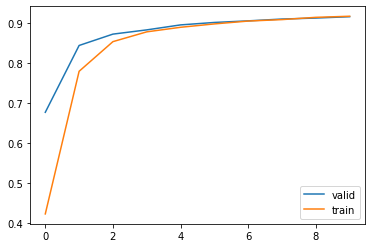

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history["val_accuracy"], label="valid")
plt.plot(h.history["accuracy"], label="train")
plt.legend();

## Optimizers and learning rate

**Question #7.** Change the optimizer used for your model. Use an optimizer with momentum and adaptive learning rate.

In [ ]:
model = Sequential([
    InputLayer(input_shape=(784,)),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
h = model.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200, validation_split=.3)

Epoch 1/10
210/210 - 2s - loss: 0.4259 - accuracy: 0.8803 - val_loss: 0.1896 - val_accuracy: 0.9442
Epoch 2/10
210/210 - 2s - loss: 0.1533 - accuracy: 0.9537 - val_loss: 0.1462 - val_accuracy: 0.9567
Epoch 3/10
210/210 - 2s - loss: 0.1067 - accuracy: 0.9676 - val_loss: 0.1338 - val_accuracy: 0.9606
Epoch 4/10
210/210 - 2s - loss: 0.0832 - accuracy: 0.9740 - val_loss: 0.1149 - val_accuracy: 0.9659
Epoch 5/10
210/210 - 3s - loss: 0.0636 - accuracy: 0.9807 - val_loss: 0.1051 - val_accuracy: 0.9703
Epoch 6/10
210/210 - 3s - loss: 0.0489 - accuracy: 0.9844 - val_loss: 0.1107 - val_accuracy: 0.9676
Epoch 7/10
210/210 - 3s - loss: 0.0386 - accuracy: 0.9882 - val_loss: 0.1104 - val_accuracy: 0.9693
Epoch 8/10
210/210 - 2s - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.1169 - val_accuracy: 0.9675
Epoch 9/10
210/210 - 3s - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.1101 - val_accuracy: 0.9707
Epoch 10/10
210/210 - 3s - loss: 0.0200 - accuracy: 0.9939 - val_loss: 0.1093 - val_accuracy: 0.9721

**Question #8.** Using [the docs](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers), vary the learning rate of your optimizer from a very low value to a much larger one so as to show evidence of:
* instability when the learning rate is too large;
* slow convergence when the learning rate is too low.

In [ ]:
from tensorflow.keras.optimizers import SGD

model = Sequential([
    InputLayer(input_shape=(784,)),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation="softmax")
])

model.compile(optimizer=SGD(learning_rate=10), loss="categorical_crossentropy", metrics=["accuracy"])
h = model.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200, validation_split=.3)

Epoch 1/10
210/210 - 3s - loss: 114446815803428000759808.0000 - accuracy: 0.1019 - val_loss: 2.3365 - val_accuracy: 0.1006
Epoch 2/10
210/210 - 3s - loss: 2.3232 - accuracy: 0.1031 - val_loss: 2.3350 - val_accuracy: 0.1079
Epoch 3/10
210/210 - 3s - loss: 2.3236 - accuracy: 0.1024 - val_loss: 2.3290 - val_accuracy: 0.1035
Epoch 4/10
210/210 - 2s - loss: 2.3254 - accuracy: 0.1021 - val_loss: 2.3148 - val_accuracy: 0.0989
Epoch 5/10
210/210 - 2s - loss: 2.3241 - accuracy: 0.1033 - val_loss: 2.3098 - val_accuracy: 0.1075
Epoch 6/10
210/210 - 2s - loss: 2.3247 - accuracy: 0.1032 - val_loss: 2.3402 - val_accuracy: 0.1079
Epoch 7/10
210/210 - 2s - loss: 2.3249 - accuracy: 0.1030 - val_loss: 2.3103 - val_accuracy: 0.1035
Epoch 8/10
210/210 - 3s - loss: 2.3273 - accuracy: 0.0990 - val_loss: 2.3149 - val_accuracy: 0.1006
Epoch 9/10
210/210 - 2s - loss: 2.3238 - accuracy: 0.1033 - val_loss: 2.3186 - val_accuracy: 0.1075
Epoch 10/10
210/210 - 2s - loss: 2.3220 - accuracy: 0.1047 - val_loss: 2.3125

## Callbacks

Callbacks are tools that, in `keras`, allow one to intervene during the training process of a model. 
Callbacks can be used to take actions (_ie._ save intermediate model, stop optimization if overfitting occurs, _etc._).

A first callback one can play with is the one returned by any call to `fit` on a `keras` model.
This callback is an object with an `.history` attribute in the form of a Python dictionnary whose keys are the metrics recorded during training. Each of these keys links to an array containing the consecutive values of the considered quantity (one value per epoch).

**Question #9.** Plot correct classification rates on both training and validation sets.

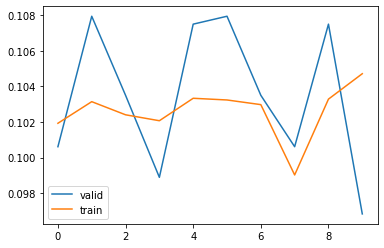

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history["val_accuracy"], label="valid")
plt.plot(h.history["accuracy"], label="train")
plt.legend();

Setting up other callbacks must be explicit. This is done by passing a list of callbacks to the `fit` method.

When training a model is long, one can wish to record intermediate models (in case of a crash during training, or just for cases when intermediate models were performing better than the final one).
The [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback is designed for that purpose.

**Question #10.** Set up recording of intermediate models every epoch. Save the models into a dedicated file `model.hdf5` on your Deepnote project. Only record models if validation loss is lower than for all previous models.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

cb_cp = ModelCheckpoint(
    "model_{epoch:02d}.hdf5", monitor='val_loss', verbose=0, save_best_only=True
)

model = Sequential([
    InputLayer(input_shape=(784,)),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
h = model.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200, validation_split=.3,
              callbacks=[cb_cp])

Epoch 1/10
210/210 - 3s - loss: 0.4196 - accuracy: 0.8832 - val_loss: 0.1991 - val_accuracy: 0.9412
Epoch 2/10
210/210 - 3s - loss: 0.1527 - accuracy: 0.9553 - val_loss: 0.1550 - val_accuracy: 0.9544
Epoch 3/10
210/210 - 3s - loss: 0.1042 - accuracy: 0.9687 - val_loss: 0.1242 - val_accuracy: 0.9634
Epoch 4/10
210/210 - 3s - loss: 0.0763 - accuracy: 0.9768 - val_loss: 0.1524 - val_accuracy: 0.9555
Epoch 5/10
210/210 - 3s - loss: 0.0605 - accuracy: 0.9815 - val_loss: 0.1211 - val_accuracy: 0.9633
Epoch 6/10
210/210 - 3s - loss: 0.0431 - accuracy: 0.9872 - val_loss: 0.1199 - val_accuracy: 0.9662
Epoch 7/10
210/210 - 3s - loss: 0.0361 - accuracy: 0.9891 - val_loss: 0.1141 - val_accuracy: 0.9684
Epoch 8/10
210/210 - 3s - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.1179 - val_accuracy: 0.9690
Epoch 9/10
210/210 - 4s - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.1145 - val_accuracy: 0.9714
Epoch 10/10
210/210 - 3s - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.1194 - val_accuracy: 0.9712

Use the code below to check that a model has been saved:

In [ ]:
!ls -alh "model.hdf5"

-rw-r--r-- 1 root root 544K Feb 16  2021 model.hdf5


## Regularization

**Question #11.** Add an $\ell_2$ regularization to the weights of your model and show its impact on overfitting. [These docs](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers) could help.

In [ ]:
from tensorflow.keras.regularizers import L2

model = Sequential([
    InputLayer(input_shape=(784,)),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation="softmax", kernel_regularizer=L2(0.01))
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
h = model.fit(x_train, y_train, verbose=2, epochs=20, batch_size=200, validation_split=.3)

Epoch 1/20
210/210 - 3s - loss: 0.5793 - accuracy: 0.8705 - val_loss: 0.3003 - val_accuracy: 0.9416
Epoch 2/20
210/210 - 3s - loss: 0.2491 - accuracy: 0.9516 - val_loss: 0.2206 - val_accuracy: 0.9568
Epoch 3/20
210/210 - 3s - loss: 0.1800 - accuracy: 0.9645 - val_loss: 0.1796 - val_accuracy: 0.9620
Epoch 4/20
210/210 - 3s - loss: 0.1395 - accuracy: 0.9718 - val_loss: 0.1516 - val_accuracy: 0.9674
Epoch 5/20
210/210 - 3s - loss: 0.1118 - accuracy: 0.9772 - val_loss: 0.1408 - val_accuracy: 0.9688
Epoch 6/20
210/210 - 3s - loss: 0.0924 - accuracy: 0.9825 - val_loss: 0.1271 - val_accuracy: 0.9704
Epoch 7/20
210/210 - 3s - loss: 0.0799 - accuracy: 0.9842 - val_loss: 0.1208 - val_accuracy: 0.9721
Epoch 8/20
210/210 - 3s - loss: 0.0675 - accuracy: 0.9866 - val_loss: 0.1153 - val_accuracy: 0.9723
Epoch 9/20
210/210 - 3s - loss: 0.0609 - accuracy: 0.9882 - val_loss: 0.1160 - val_accuracy: 0.9709
Epoch 10/20
210/210 - 3s - loss: 0.0513 - accuracy: 0.9906 - val_loss: 0.1101 - val_accuracy: 0.9737

**Question #12.** Instead of the $\ell_2$ regularization, set up a [drop-out](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) strategy and assess its impact on overfitting (you will turn off 10% of the neurons at each training batch).

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    InputLayer(input_shape=(784,)),
    Dense(units=128, activation='relu'),
    Dropout(rate=0.2),
    Dense(units=128, activation='relu'),
    Dropout(rate=0.2),
    Dense(units=128, activation='relu'),
    Dropout(rate=0.2),
    Dense(units=10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
h = model.fit(x_train, y_train, verbose=2, epochs=20, batch_size=200, validation_split=.3)

Epoch 1/20
210/210 - 2s - loss: 0.5974 - accuracy: 0.8149 - val_loss: 0.2050 - val_accuracy: 0.9406
Epoch 2/20
210/210 - 2s - loss: 0.2254 - accuracy: 0.9333 - val_loss: 0.1471 - val_accuracy: 0.9557
Epoch 3/20
210/210 - 2s - loss: 0.1656 - accuracy: 0.9494 - val_loss: 0.1220 - val_accuracy: 0.9643
Epoch 4/20
210/210 - 2s - loss: 0.1350 - accuracy: 0.9584 - val_loss: 0.1163 - val_accuracy: 0.9646
Epoch 5/20
210/210 - 2s - loss: 0.1149 - accuracy: 0.9649 - val_loss: 0.1081 - val_accuracy: 0.9686
Epoch 6/20
210/210 - 2s - loss: 0.1001 - accuracy: 0.9693 - val_loss: 0.1071 - val_accuracy: 0.9693
Epoch 7/20
210/210 - 2s - loss: 0.0879 - accuracy: 0.9733 - val_loss: 0.1010 - val_accuracy: 0.9711
Epoch 8/20
210/210 - 2s - loss: 0.0785 - accuracy: 0.9748 - val_loss: 0.0978 - val_accuracy: 0.9729
Epoch 9/20
210/210 - 3s - loss: 0.0722 - accuracy: 0.9775 - val_loss: 0.0937 - val_accuracy: 0.9732
Epoch 10/20
210/210 - 3s - loss: 0.0680 - accuracy: 0.9784 - val_loss: 0.0956 - val_accuracy: 0.9734

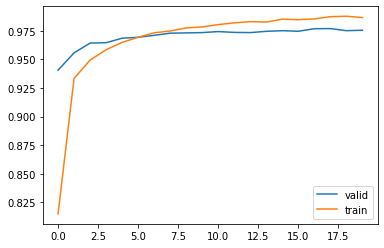

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history["val_accuracy"], label="valid")
plt.plot(h.history["accuracy"], label="train")
plt.legend();

**Question #13.** Set up an [`EarlyStopping`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) strategy such that training the model will stop in case the validation loss does not decrease for 5 consecutive epochs.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

cb_es = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

model = Sequential([
    InputLayer(input_shape=(784,)),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
h = model.fit(x_train, y_train, verbose=2, epochs=20, batch_size=200, validation_split=.3,
              callbacks=[cb_es])

Epoch 1/20
210/210 - 2s - loss: 0.4246 - accuracy: 0.8791 - val_loss: 0.2059 - val_accuracy: 0.9378
Epoch 2/20
210/210 - 2s - loss: 0.1538 - accuracy: 0.9544 - val_loss: 0.1470 - val_accuracy: 0.9547
Epoch 3/20
210/210 - 2s - loss: 0.1047 - accuracy: 0.9680 - val_loss: 0.1241 - val_accuracy: 0.9614
Epoch 4/20
210/210 - 2s - loss: 0.0755 - accuracy: 0.9769 - val_loss: 0.1198 - val_accuracy: 0.9645
Epoch 5/20
210/210 - 2s - loss: 0.0588 - accuracy: 0.9821 - val_loss: 0.1151 - val_accuracy: 0.9648
Epoch 6/20
210/210 - 2s - loss: 0.0463 - accuracy: 0.9854 - val_loss: 0.1105 - val_accuracy: 0.9682
Epoch 7/20
210/210 - 2s - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.1013 - val_accuracy: 0.9718
Epoch 8/20
210/210 - 2s - loss: 0.0283 - accuracy: 0.9916 - val_loss: 0.1136 - val_accuracy: 0.9694
Epoch 9/20
210/210 - 2s - loss: 0.0226 - accuracy: 0.9933 - val_loss: 0.1175 - val_accuracy: 0.9708
Epoch 10/20
210/210 - 2s - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.1215 - val_accuracy: 0.9697

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=42d3e808-a75c-4f9e-8bf1-115b96f89fc0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>